# Corn Leaf Diseases Detection Through Deep Neural Network
Corn leaf has 3 kinds of diseases
<ul>
<li>Blight</li>
<li>Grey Leaf Spot</li>
<li>Common Rust</li>
<li>Healthy</li>
</ul>

### Prepare local Machine

```
pip install jupyter 
pip install tensorflow 
pip install numpy
pip install matplotlib
```


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

batch size 32 mean we process 32 image together in a single unit

In [2]:
Image_Size= (256,256)
Batch_Size = 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:/Desktop/Projects/corn_leaf/data/",
    image_size = Image_Size,
    batch_size = Batch_Size,
    shuffle = True
)

class_names = dataset.class_names
print(dataset.class_names)
print("\nTotal data chunk (*batch_size): ", len(dataset))


Found 4188 files belonging to 4 classes.
['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

Total data chunk (*batch_size):  131


### View our Data
Convert image to numpy array to display through matplotlib

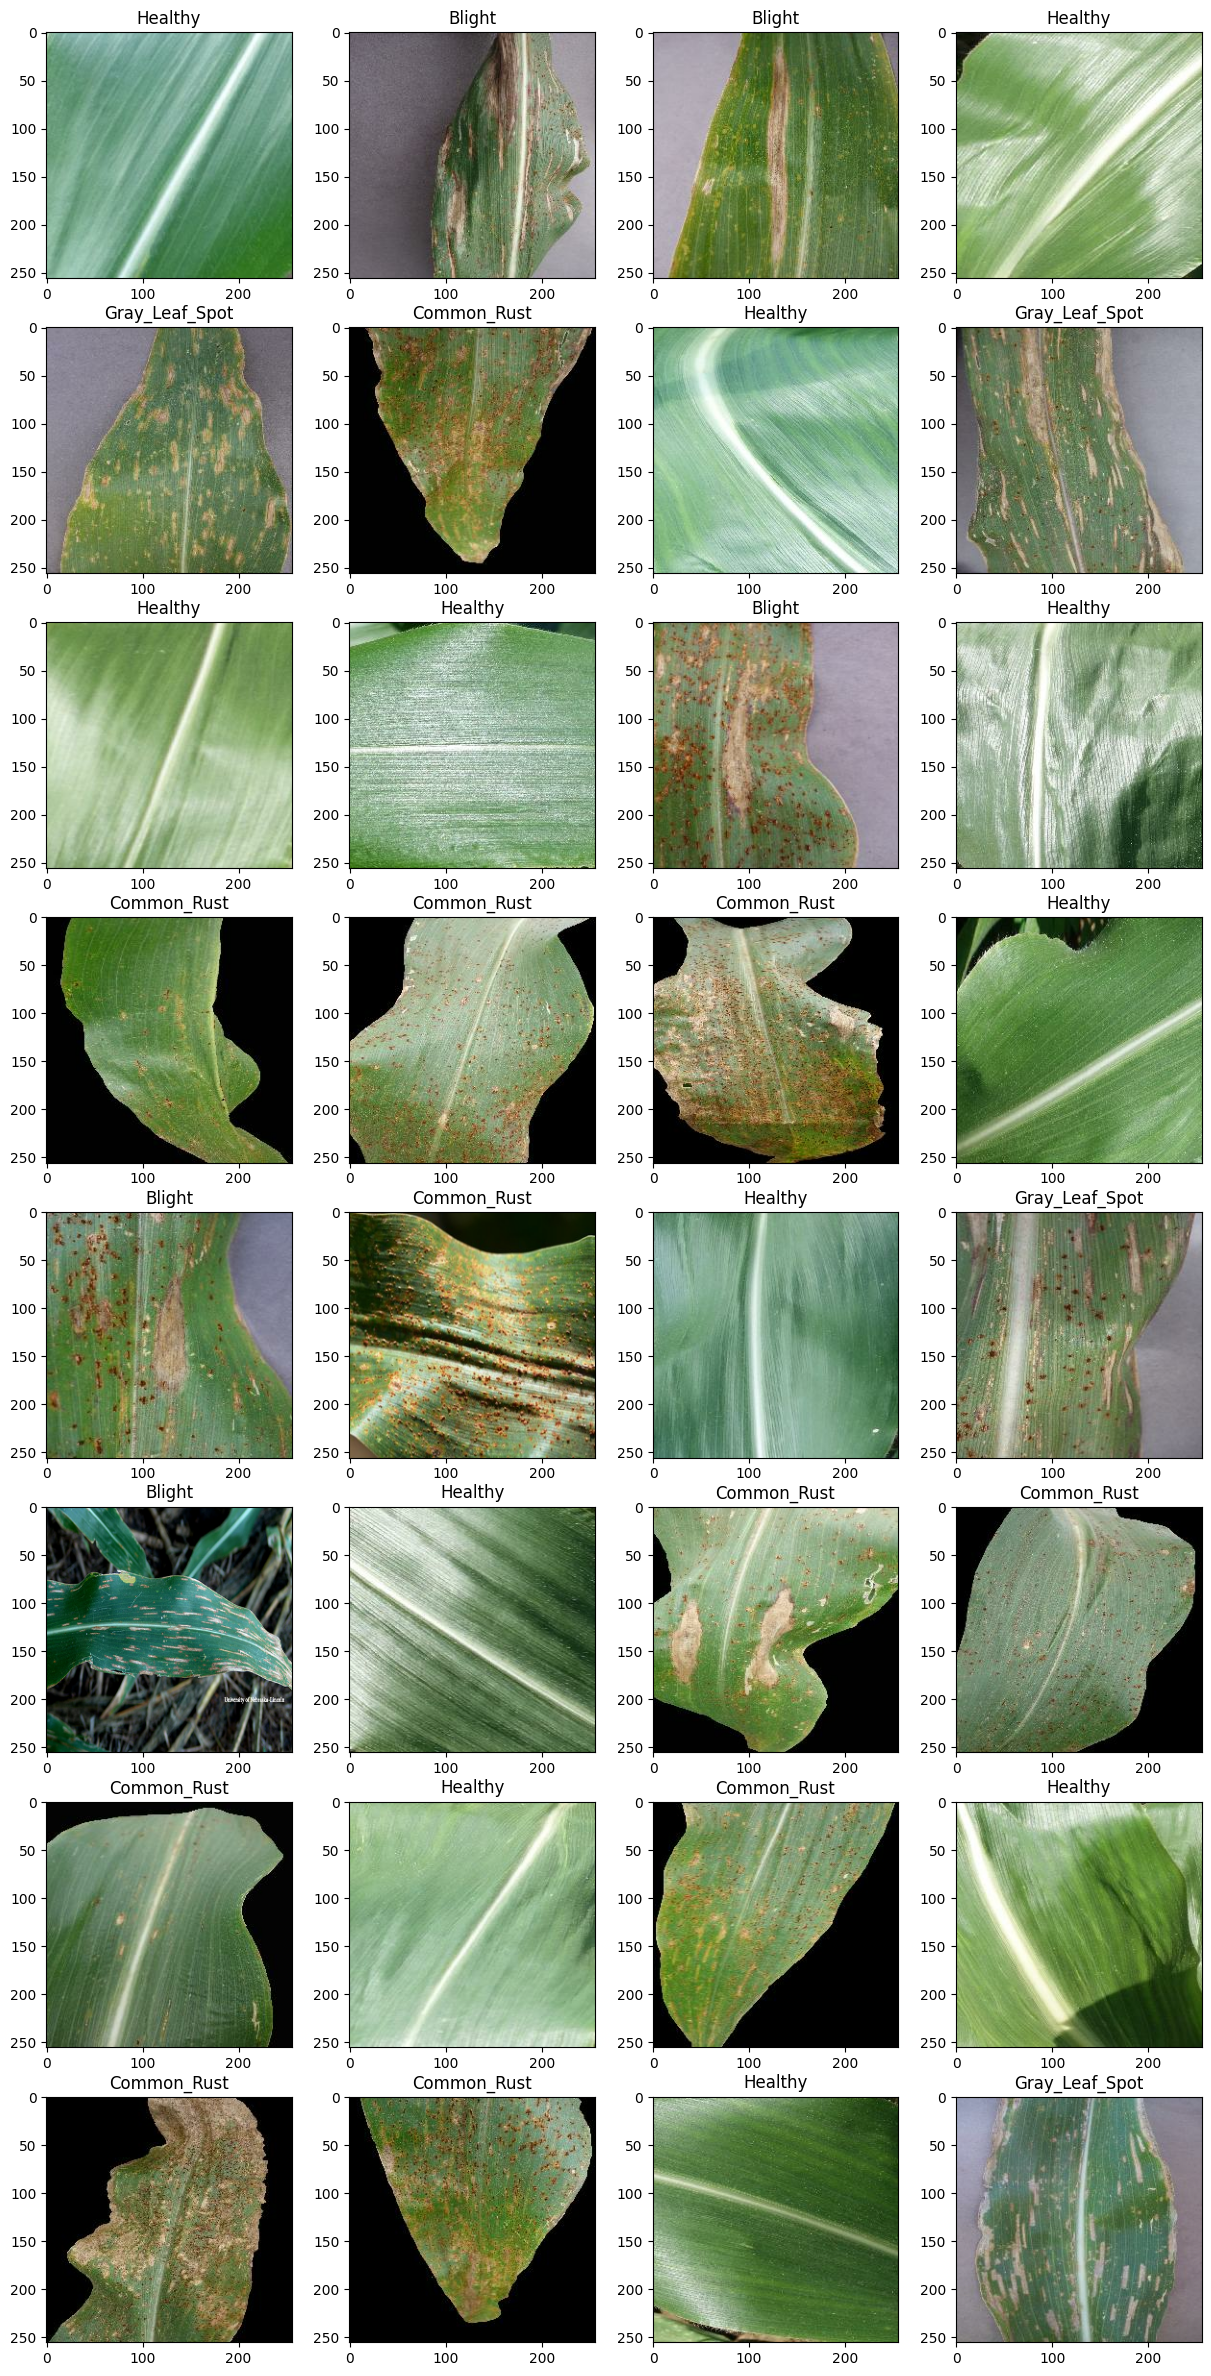

In [4]:
plt.figure(figsize=(15,30))
for per_img_batch, label_batch in dataset.take(1):
    for i in range(32):
        ax = plt.subplot(8,4, i+1)
        plt.imshow(per_img_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        

### Train test split

* Shuffle our dataset 1000 times
* Each train, test, validation dataset has 32 image as batch size

**Validation dataset** is like test dataset but used in model training to fine-tunning the model

In [5]:
dataset_size = len(dataset)
dataset = dataset.shuffle(1000)

train_size = int(0.8 * dataset_size) 
validation_size = int(0.1 * dataset_size)

train_ds = dataset.take(train_size)
validation_ds = dataset.skip(train_size).take(validation_size)
test_ds = dataset.skip(train_size).skip(validation_size)

print("Train_size: *32(batch_size): ",len(train_ds))
print("Test_size:", len(test_ds))
print("Validation_size: ", len(validation_ds))

Train_size: *32(batch_size):  104
Test_size: 14
Validation_size:  13


### Shuffle and Store dataset in cache for faster loading

In [6]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Developping our model

In [7]:
preprocessing = tf.keras.models.Sequential([
    tf.keras.layers.Resizing(256,256),
    tf.keras.layers.Rescaling(1.0/255),
])      


### Convolution multiple image pixels with specific matrix and generate new image
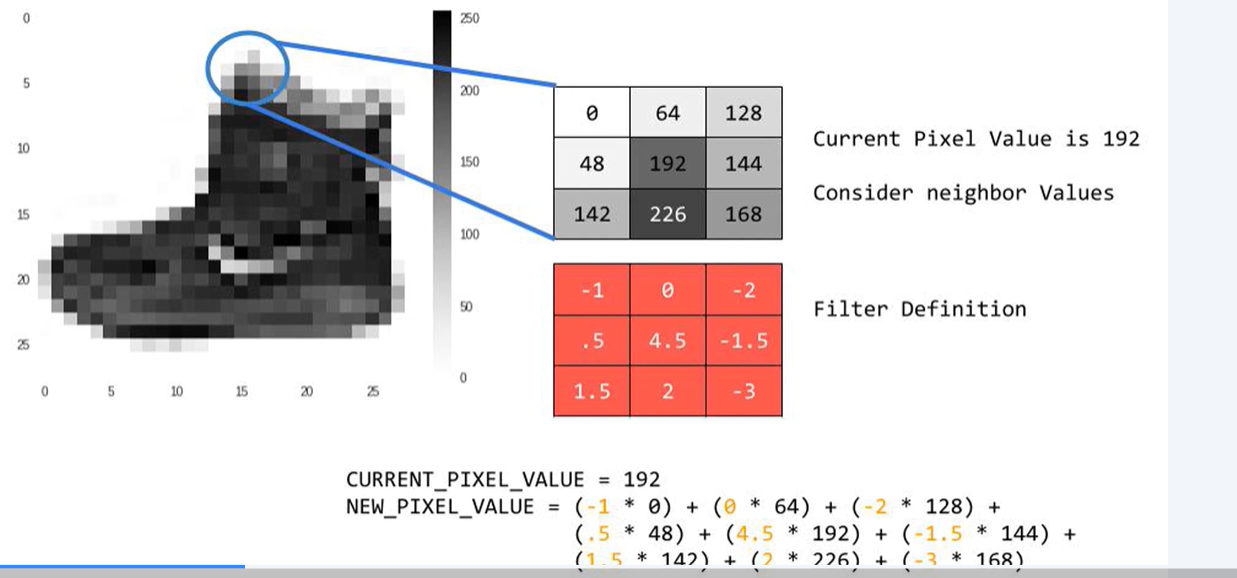


### Convolution
```
tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

Activation = "relu" means we remove negative pixels with 0
64 different filter used
each filter 3x3 size
```

### Maxxplooling take the biggest pixel also reduce the size of the image
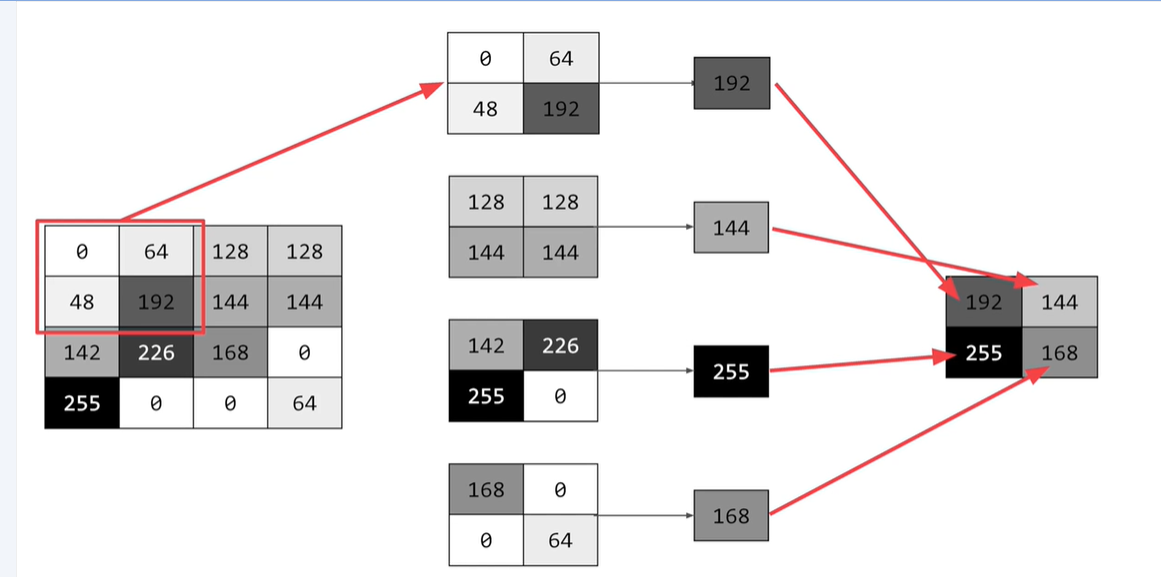


In [23]:
input_shape = (Batch_Size,256, 256, 3)

model = tf.keras.Sequential([
    preprocessing,
    # tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    # next layers in the neural network with 64 unit
    tf.keras.layers.Dense(64, activation='relu'),
    # Final Layer with 4 class
    tf.keras.layers.Dense(4, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,284 (1.13 MB)

 Trainable params: 297,284 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

### We need to put a callback so that training stop at a certain level of accuracy

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        '''
        Halts the training when accuracy over 90%
        '''
        if logs['accuracy'] >= 0.92:
            print("Accuracy over 92 parcent hence close training")
            self.model.stop_training = True
            

In [16]:
model.fit(train_ds,
          epochs = 10,
          batch_size = Batch_Size,
          validation_data = validation_ds,
          callbacks=[myCallback()]
          )

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.5613 - loss: 1.0086 - val_accuracy: 0.8413 - val_loss: 0.3863
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.8437 - loss: 0.4058 - val_accuracy: 0.8630 - val_loss: 0.3310
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.8447 - loss: 0.3873 - val_accuracy: 0.8774 - val_loss: 0.3141
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.8784 - loss: 0.3030 - val_accuracy: 0.8774 - val_loss: 0.2854
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.8878 - loss: 0.3066 - val_accuracy: 0.8966 - val_loss: 0.2418
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.8963 - loss: 0.2564 - val_accuracy: 0.9231 - val_loss: 0.2037
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.9050 - loss: 0.2215 - val_accuracy: 0.9351 - val_loss: 0.1811
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.9167 - loss: 0.1972 - val_accu

### Saving our model

In [17]:
model.save('corn_model.h5')

# Test Result

In [18]:
result = model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 429ms/step - accuracy: 0.9432 - loss: 0.1552
